In [1]:
import glob
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import numpy as np

dir = "camera_cal"
images = [mpimg.imread(f) for f in glob.glob(os.path.join(dir, "calibration*.jpg"))]    


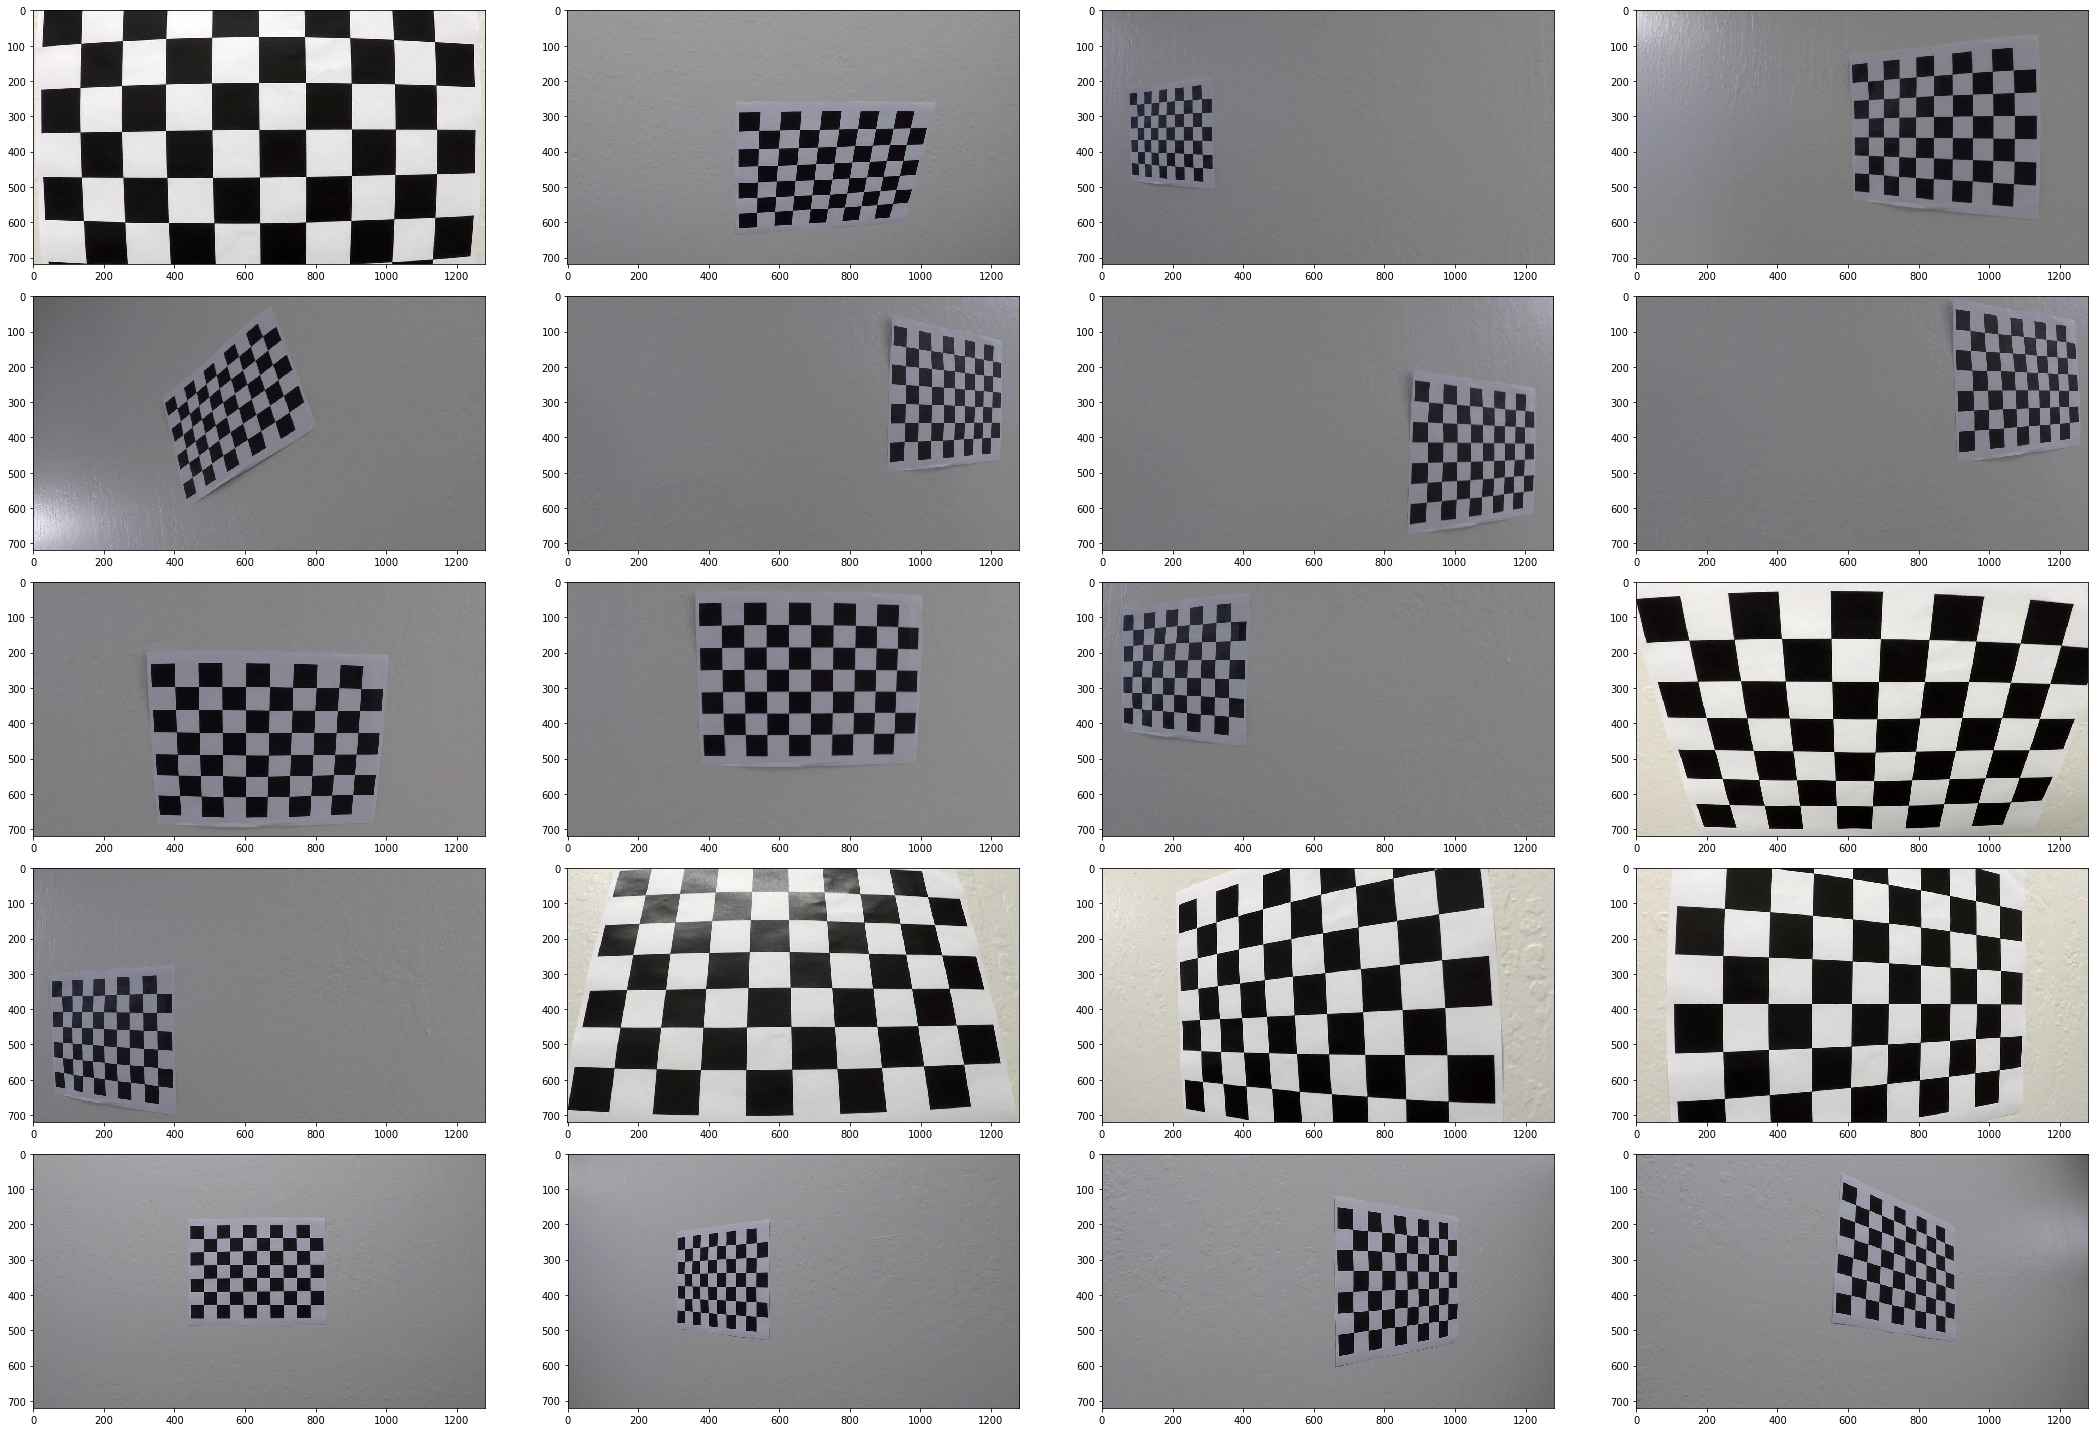

In [9]:
def display_cal_images(images):
    col = 4
    row = (len(images)-1)//col + 1
    gs = gridspec.GridSpec(row, col)
    fig = plt.figure(figsize=(30,20))
    for im,g in zip(images, gs):
        fig.add_subplot(g).imshow(im)
    gs.tight_layout(fig)
    plt.show()

display_cal_images(images)

(20, 3)


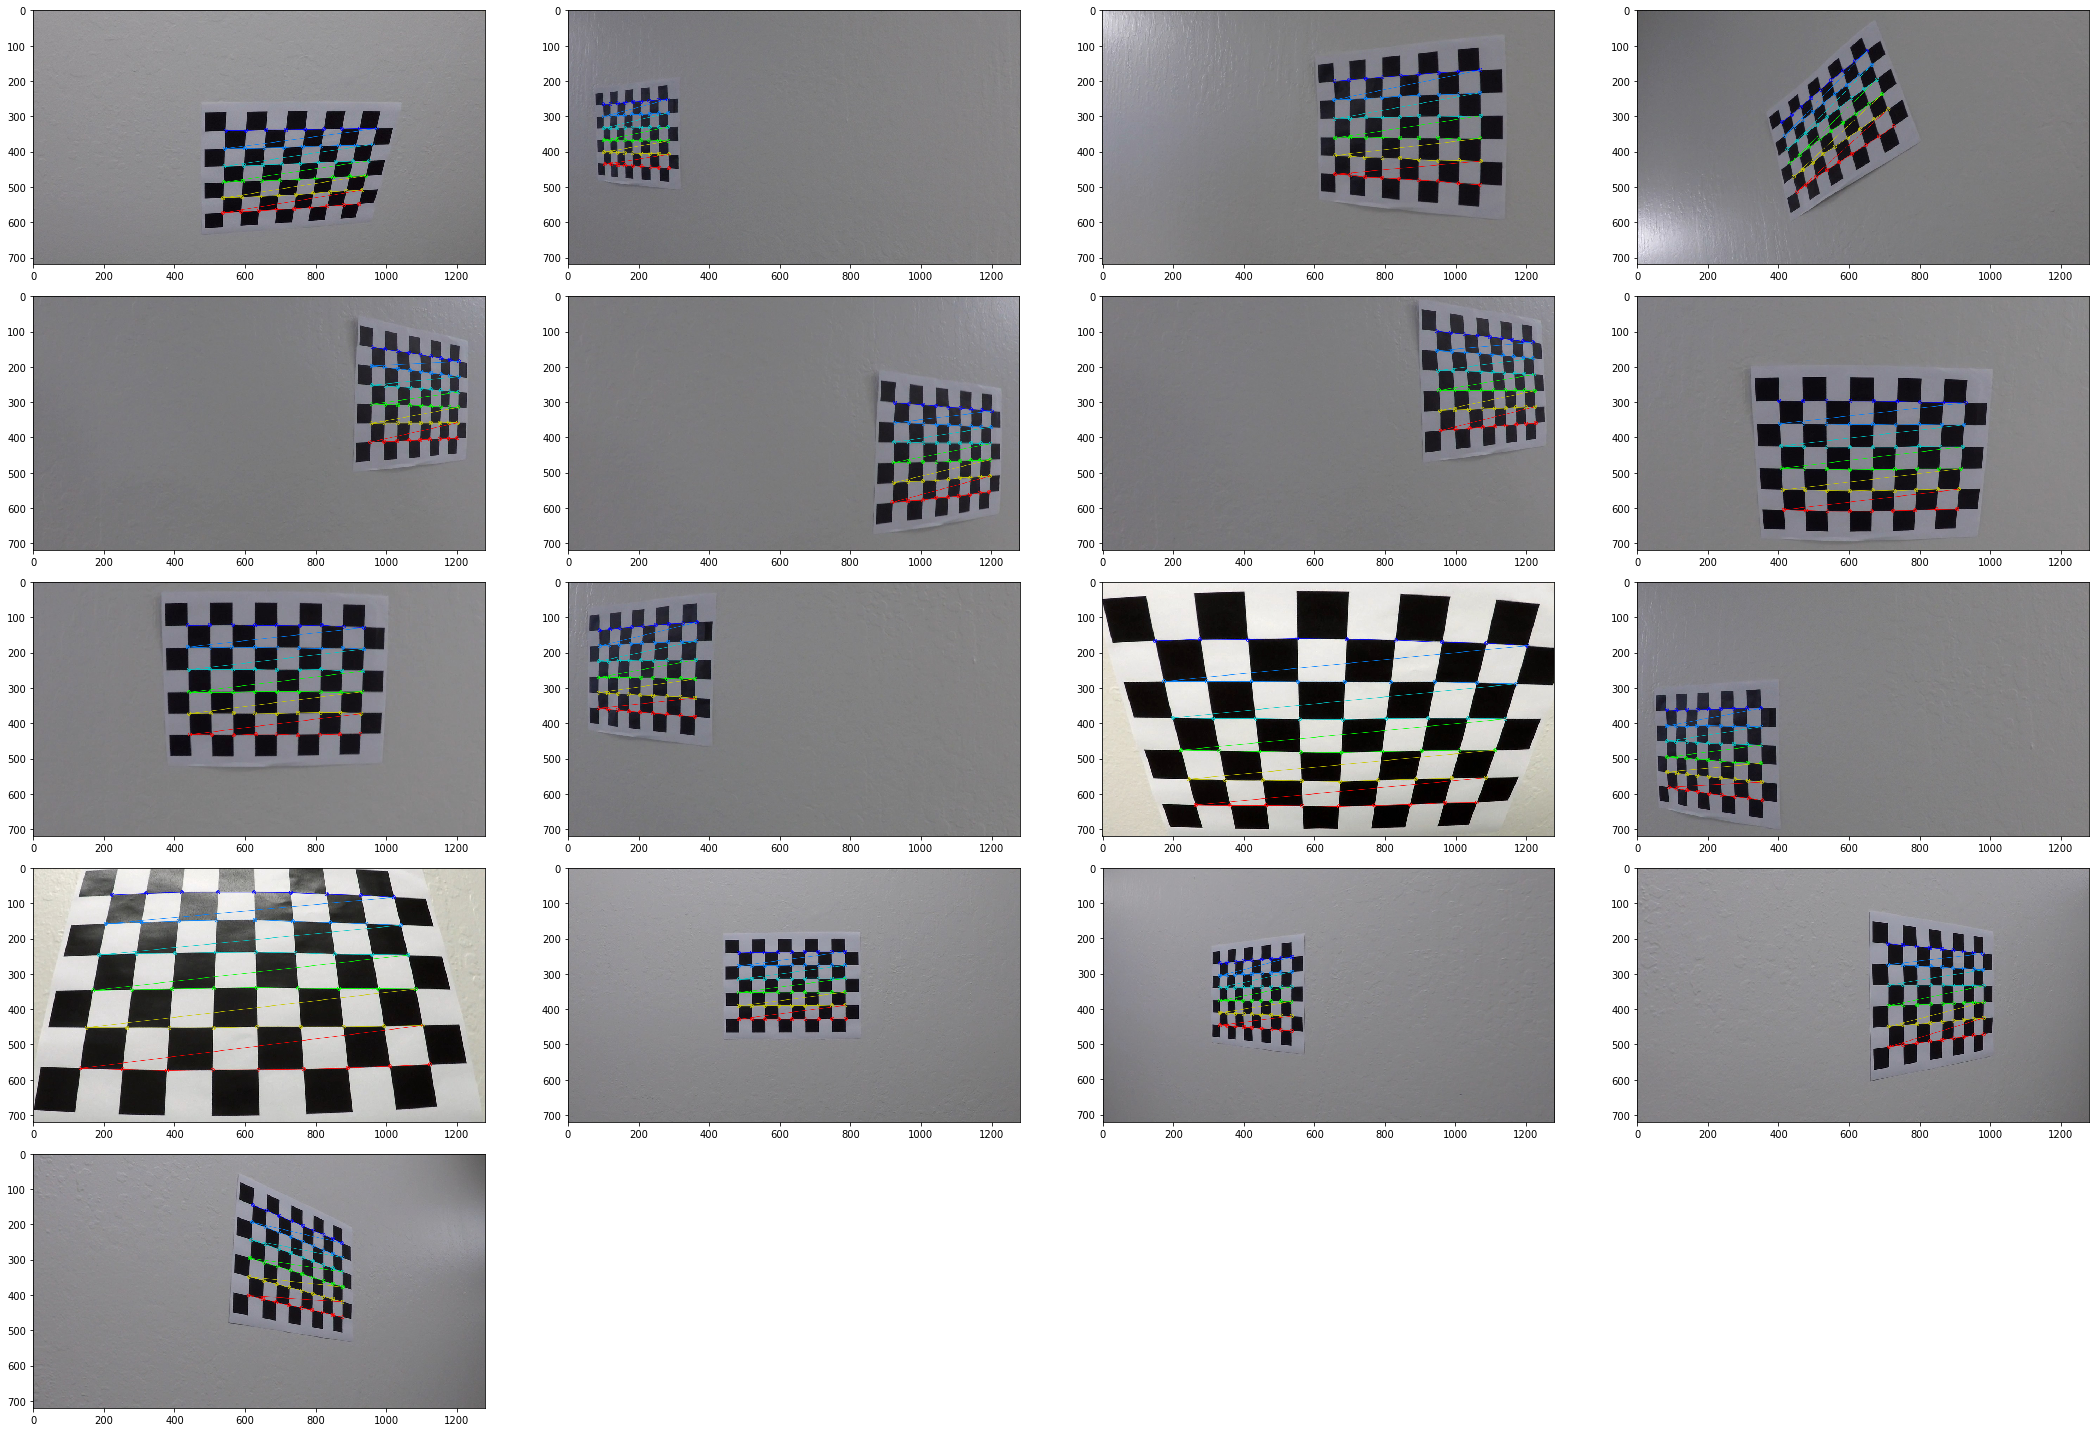

In [34]:

dim = (9,6)

def findChessboardCorners(im):
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    found, corners = cv2.findChessboardCorners(gray, dim, None)
    ret = cv2.drawChessboardCorners(np.copy(im), dim, corners, found) if found else im
    return ret, found, corners

processed = np.vstack([findChessboardCorners(im) for im in images])
print(processed.shape)
valid = processed[processed[:,1]==True]
display_cal_images(valid[:,0])

In [81]:
image_shape = valid[0, 0].shape
r,c = dim
image_points = np.array([v.squeeze() for v in valid[:,2]])
coords = np.zeros((r*c,3), np.float32)
coords[:,:2] = np.mgrid[:r, :c].T.reshape(-1, 2)
object_points = np.tile(coords, (image_points.shape[0], 1, 1))
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, image_shape[0:2], None, None)